<a href="https://colab.research.google.com/github/tonystark3110/shadowremoval/blob/main/shadoww.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## init all the necessary models
!rm -rf *

!gdown https://drive.google.com/uc?id=1r6QD7lEM6UTMbnoxEQqTsK0k0B8XziC1
!gdown https://drive.google.com/uc?id=1rEIWWLwEpbZGPyFUc9jSIQr78ZeQy5eZ
!unzip srdplus-pretrained.zip && rm srdplus-pretrained.zip

!git clone  https://github.com/tonystark3110/shadowv2
!cp shadowv2/networks.py .

vgg19_path = 'imagenet-vgg-verydeep-19.mat'
pretrain_model_path = 'srdplus-pretrained/'
sample_path = 'shadowremoval/samples'

'rm' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


Loading Pre-trained Model

In [4]:
# loaded pretrained model and build the calculate graph

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tf_slim as slim
import numpy as np
import matplotlib.pyplot as plt
from networks import build_aggasatt_joint
tf.compat.v1.reset_default_graph()

with tf.compat.v1.variable_scope(tf.compat.v1.get_variable_scope()):
    input=tf.compat.v1.placeholder(tf.float32,shape=[None,None,None,3])
    shadow_free_image=build_aggasatt_joint(input,64,vgg19_path)

sess=tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
idtd_ckpt=tf.train.get_checkpoint_state(pretrain_model_path)
saver_restore=tf.compat.v1.train.Saver([var for var in tf.compat.v1.trainable_variables()])
print('loaded '+idtd_ckpt.model_checkpoint_path)
saver_restore.restore(sess,idtd_ckpt.model_checkpoint_path)

UsageError: Line magic function `%tensorflow_version` not found.


Evaluation on SRD dataset

In [3]:
import os,cv2
# some samples results.
plt.rcParams["figure.figsize"] = (24,6)

for img_path in [os.path.join(sample_path,x) for x in os.listdir(sample_path) if '.jpg' in x ]:

    plt.figure()
    plt.axis('off')

    iminput=cv2.imread(img_path,-1)
    imoutput = sess.run(shadow_free_image,feed_dict={input:np.expand_dims(iminput/255.,axis=0)})

    ## imoutput[0] means the shadow removal results while imoutput[1] means the shadow detection results.
    imremoval = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput[0],0.0),1.0))*255.0)
    immask = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput[1],0.0),1.0))*255.0)
    imcompare = np.concatenate([iminput,imremoval,np.repeat(np.expand_dims(immask,axis=2),3,2)],axis=1)

    # bgr->rgb
    plt.imshow(imcompare[...,::-1])
    plt.show()

NameError: name 'plt' is not defined

Test samples from web

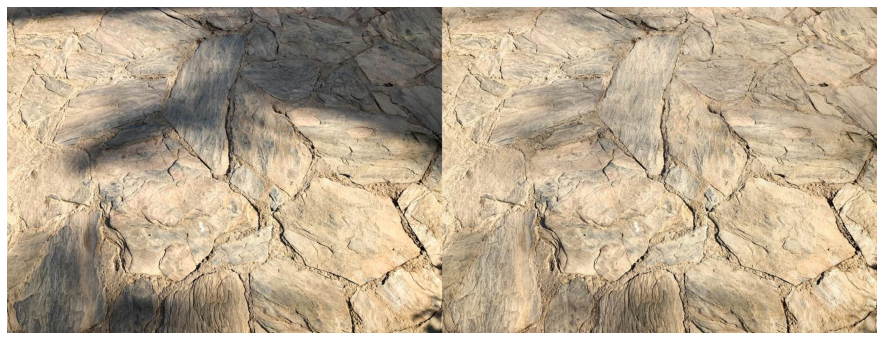

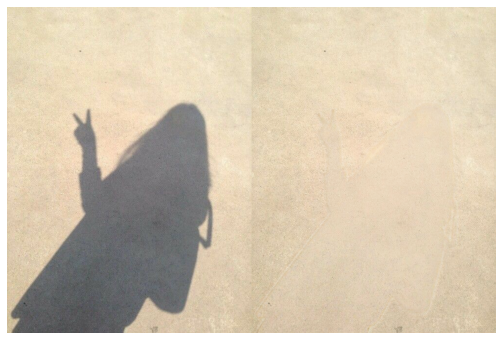

In [ ]:
# get image from web.
import requests
from io import BytesIO
from PIL import Image

plt.rcParams["figure.figsize"] = (24,6)
# images from google photo
# [you can replace the url with our own data for testing!]
urls = [
'http://thumbs.dreamstime.com/b/%E7%9F%B3%E5%A4%B4%E9%9B%95%E5%88%BB%E4%BA%86%E8%87%AA%E7%84%B6%E8%B7%AF%E7%BA%B9%E7%90%86%EF%BC%8C%E4%BB%8E%E9%B9%85%E5%8D%B5%E7%9F%B3%E5%A4%A7%E8%80%81%E5%8F%A4%E8%80%81%E9%94%90%E8%A7%92%E7%9A%84%E7%9F%B3%E5%A4%B4%E7%9A%84%E5%A2%99%E5%A3%81%E6%9C%89%E9%95%87%E5%8E%8B%E7%9A%84%E5%9C%A8%E9%98%B4%E5%BD%B1-th-121672690.jpg',
'https://i.pinimg.com/564x/e9/97/bc/e997bc244390f34db43d0fe26b832213.jpg',
'http://thumbs.dreamstime.com/b/%E5%9C%A8%E5%A2%99%E5%A3%81%E4%B8%8A%E7%9A%84%E6%A0%91-%E5%BD%B1-96404210.jpg',
'http://thumbs.dreamstime.com/b/%E5%A4%A7%E6%A0%91%E6%9E%9D%E9%98%B4%E5%BD%B1%E7%9A%84%E6%8A%BD%E8%B1%A1%E8%87%AA%E7%84%B6%E6%A0%B7%E5%BC%8F%E5%9C%A8%E6%B5%85%E7%81%B0%E8%89%B2%E7%9A%84%E5%9D%9A%E7%A1%AC%E7%9F%B3%E6%B8%A3%E5%87%9D%E7%BB%93%E9%9D%A2%E8%83%8C%E6%99%AF%E5%9C%B0%E6%9D%BF%E4%B8%8A%E7%9A%84%E5%9C%A8%E5%A5%BD%E6%97%A5%E5%AD%90-129809634.jpg'
]

for url in urls:
  r = requests.get(url)
  # pil->numpy->bgr
  iminput = np.asarray(Image.open(BytesIO(r.content)))[...,::-1]
  imoutput = sess.run(shadow_free_image,feed_dict={input:np.expand_dims(iminput/255.,axis=0)})

  plt.figure()
  plt.axis('off')
  imoutput = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput[0],0.0),1.0))*255.0)
  imcompare = np.concatenate([iminput,imoutput],axis=1)
  # bgr->rgb
  plt.imshow(imcompare[...,::-1])
  plt.show()